In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/Users/swetha/scores.csv")
df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [5]:
df.shape

(55, 12)

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
days,55.0,12.600000,2.491467,5.0,13.0,13.0,13.0,20.0
gender,55.0,1.454545,0.502519,1.0,1.0,1.0,2.0,2.0
afftype,23.0,1.739130,0.540824,1.0,1.0,2.0,2.0,3.0
melanch,20.0,1.950000,0.223607,1.0,2.0,2.0,2.0,2.0
inpatient,23.0,1.782609,0.421741,1.0,2.0,2.0,2.0,2.0
marriage,23.0,1.521739,0.510754,1.0,1.0,2.0,2.0,2.0
work,23.0,1.869565,0.344350,1.0,2.0,2.0,2.0,2.0
madrs1,23.0,22.739130,4.797892,13.0,18.5,24.0,26.0,29.0
madrs2,23.0,20.000000,4.729021,11.0,16.0,21.0,24.5,28.0


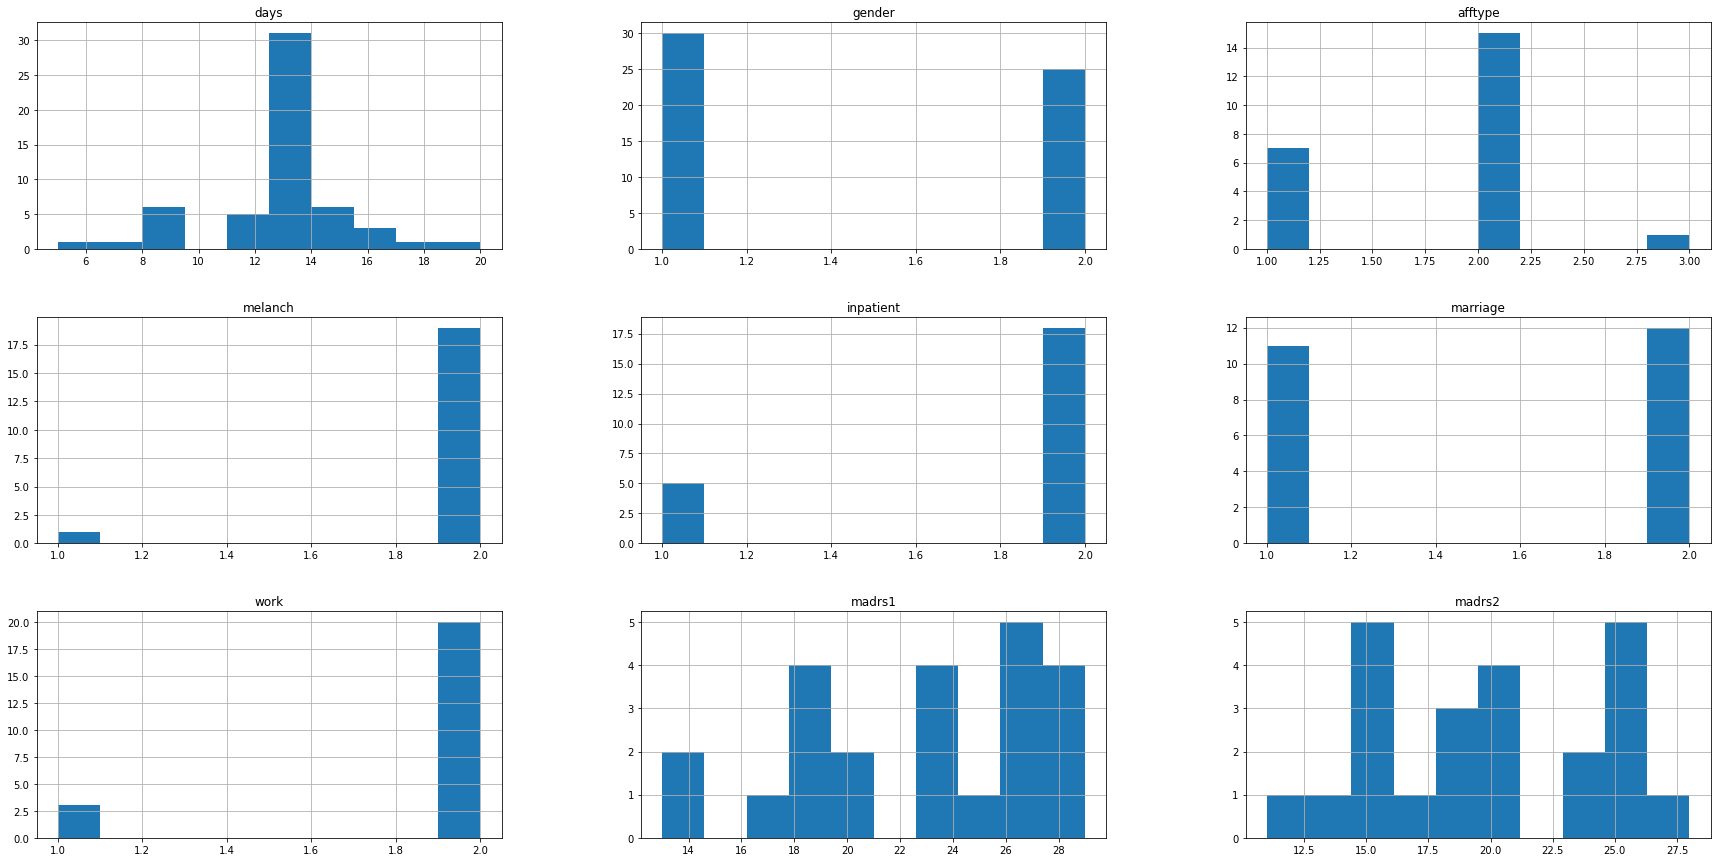

In [9]:
df.hist(figsize = (30,15))
plt.show()

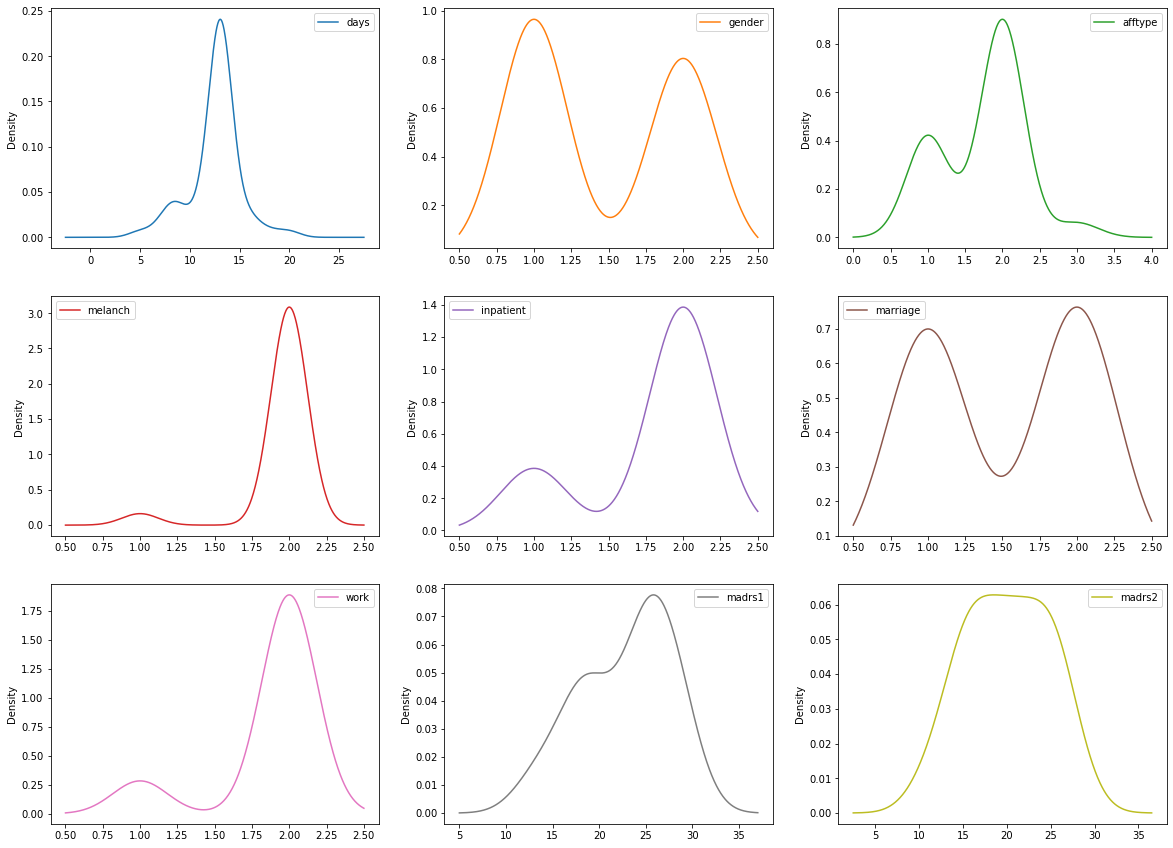

In [10]:
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

<Figure size 1800x1080 with 0 Axes>

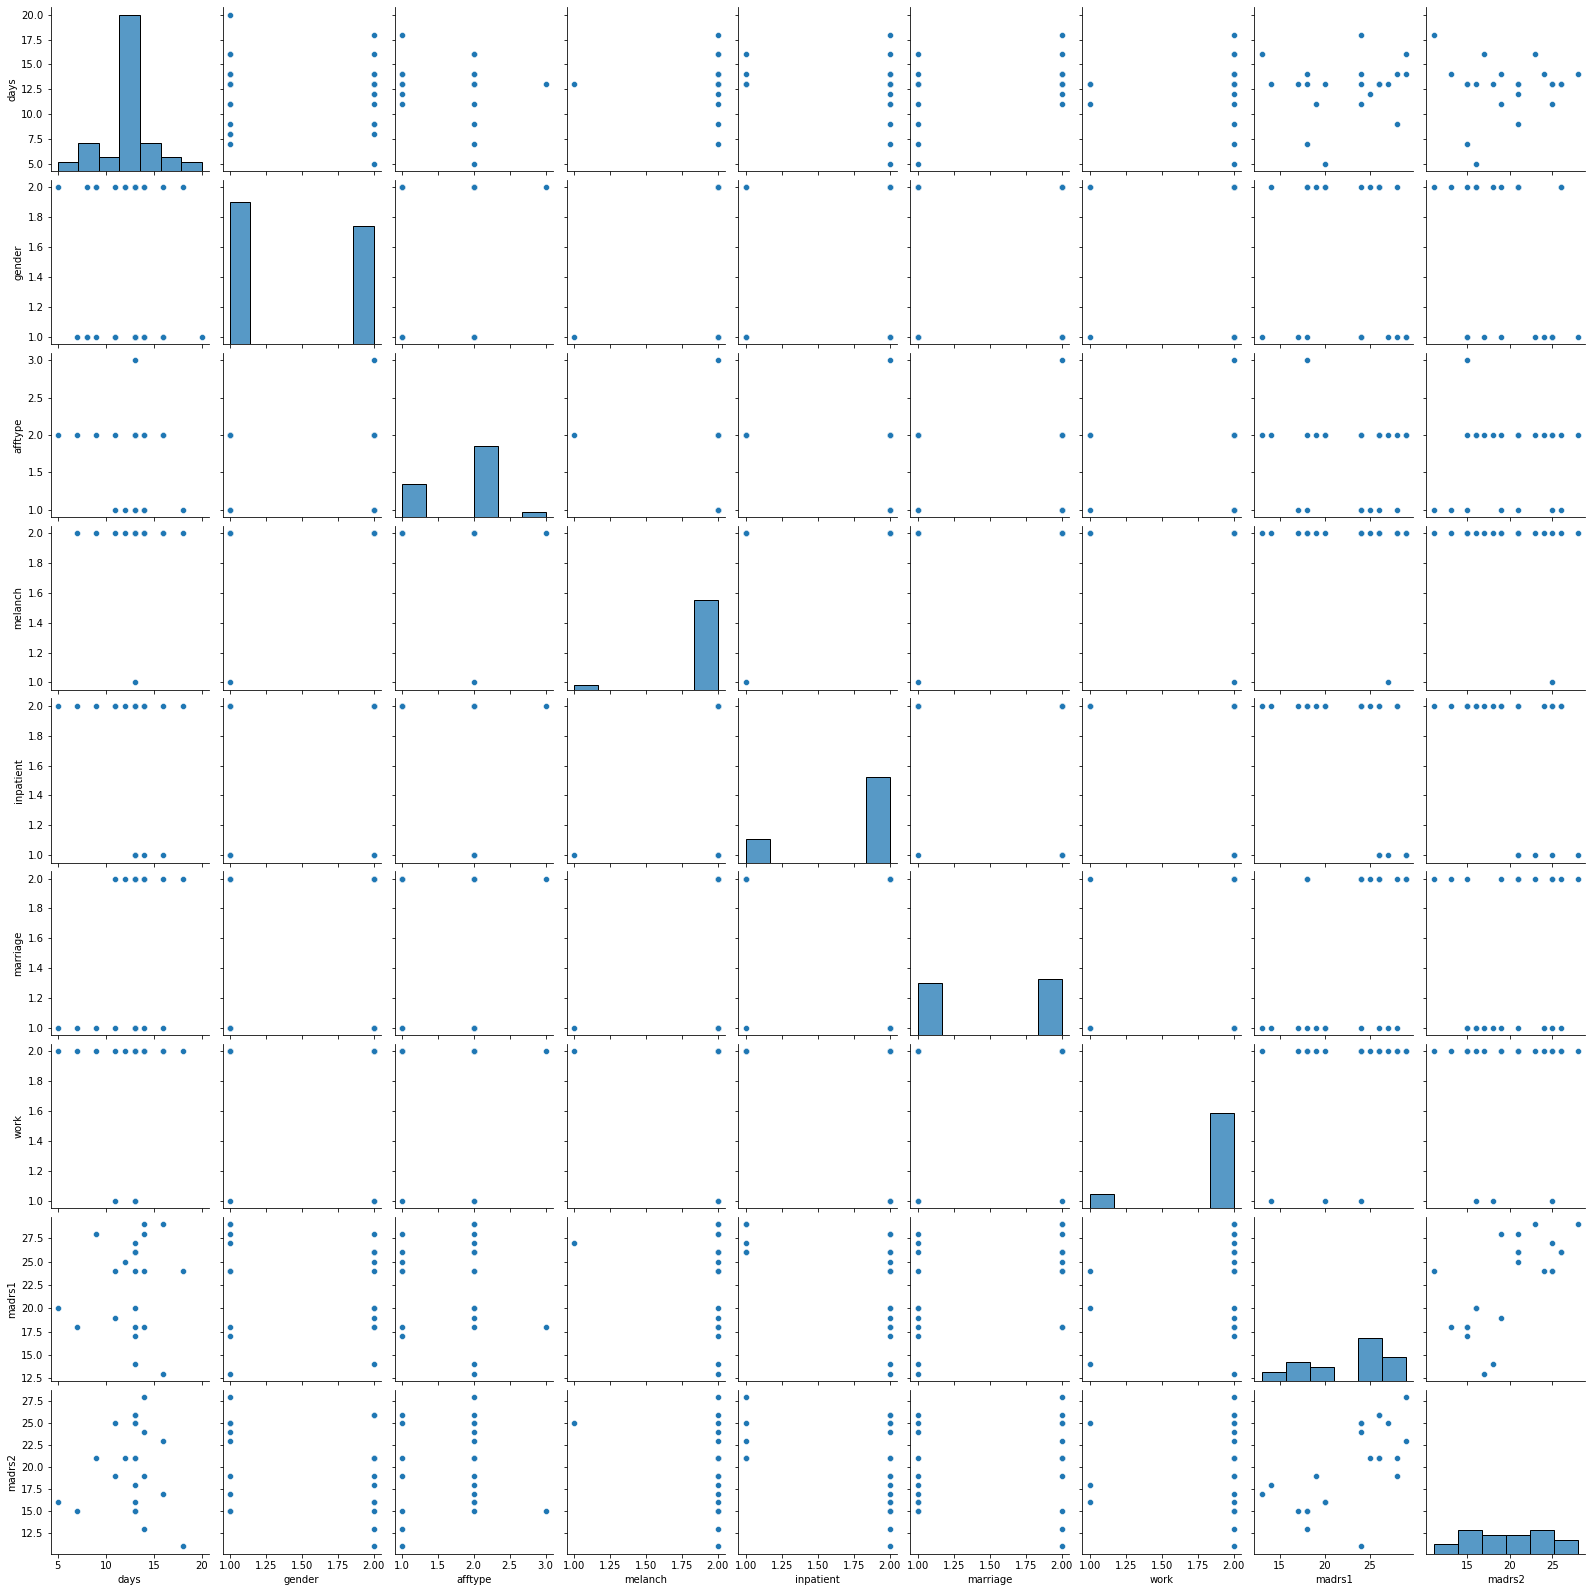

In [11]:
plt.figure(figsize = (25,15))
sns.pairplot(df)
plt.show()

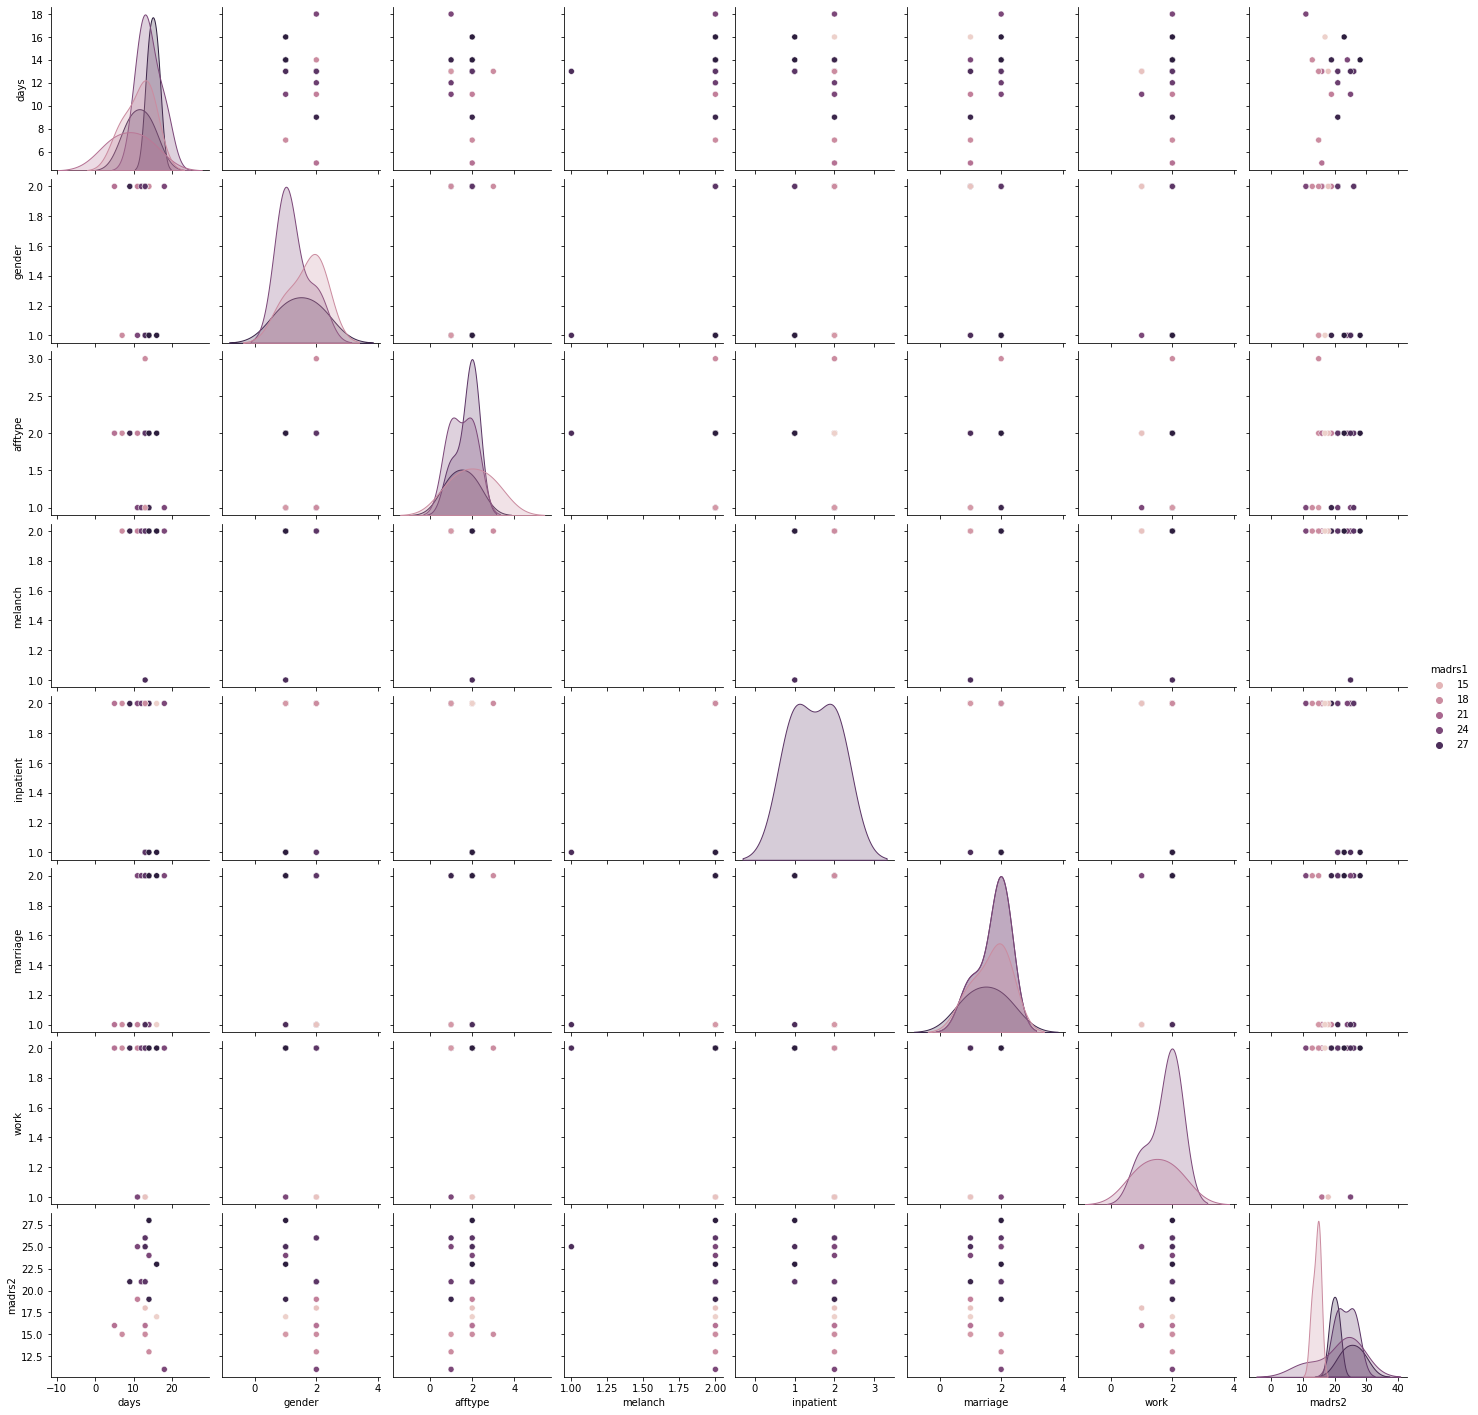

In [12]:
sns.pairplot(df,hue='madrs1') 

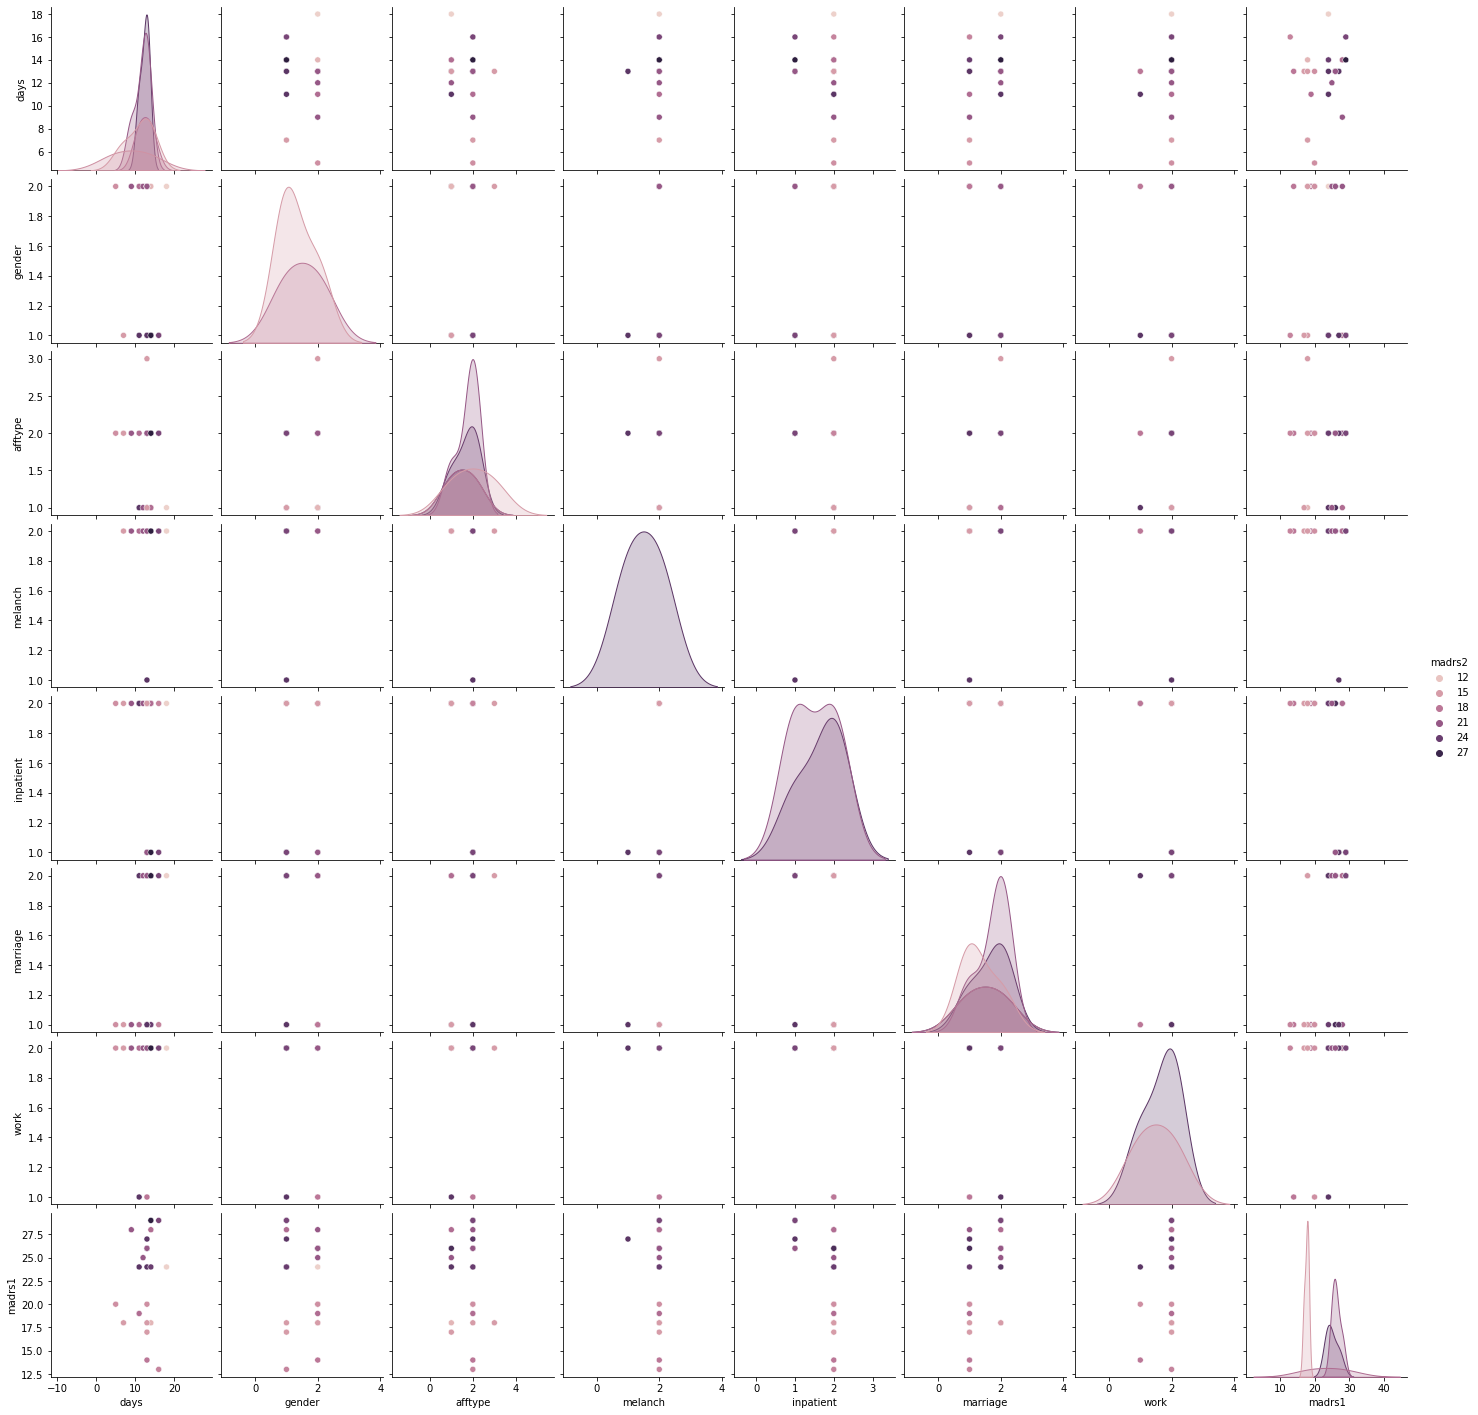

In [13]:
sns.pairplot(df,hue='madrs2') 

In [14]:
df.corr()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
days,1.000000,-0.073955,-0.184464,0.010070,-0.223032,0.390647,0.045526,0.122678,0.027726
gender,-0.073955,1.000000,0.064884,0.253629,0.175655,0.038169,-0.079259,-0.104832,-0.303410
afftype,-0.184464,0.064884,1.000000,-0.089984,-0.259938,-0.143091,0.053060,-0.132523,0.088863
melanch,0.010070,0.253629,-0.089984,1.000000,0.397360,0.253629,-0.076472,-0.202332,-0.270243
inpatient,-0.223032,0.175655,-0.259938,0.397360,1.000000,-0.293590,-0.204124,-0.523501,-0.410235
marriage,0.390647,0.038169,-0.143091,0.253629,-0.293590,1.000000,0.146077,0.447590,0.150551
work,0.045526,-0.079259,0.053060,-0.076472,-0.204124,0.146077,1.000000,0.281104,0.027913
madrs1,0.122678,-0.104832,-0.132523,-0.202332,-0.523501,0.447590,0.281104,1.000000,0.653090
madrs2,0.027726,-0.303410,0.088863,-0.270243,-0.410235,0.150551,0.027913,0.653090,1.000000


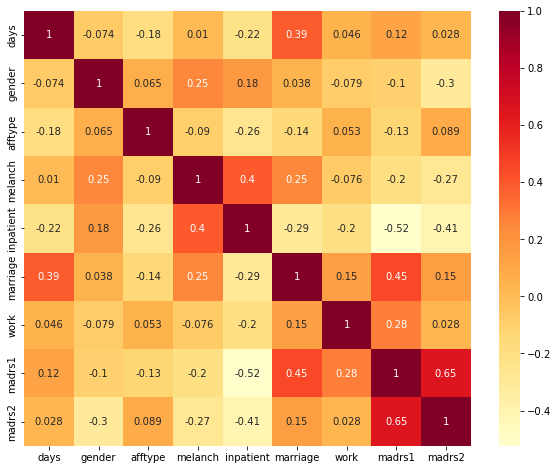

In [15]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')
plt.show()

In [16]:
df_condition = df[df.number.str.contains('condition')].copy()
df_control = df[df.number.str.contains('control')].copy()

In [17]:
df_condition.shape

(23, 12)

In [18]:
features_num = ['days','madrs1','madrs2']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

In [19]:
df_condition[features_num].describe().T

,count,mean,std,min,25%,50%,75%,max
days,23.0,12.652174,2.773391,5.0,12.5,13.0,14.0,18.0
madrs1,23.0,22.739130,4.797892,13.0,18.5,24.0,26.0,29.0
madrs2,23.0,20.000000,4.729021,11.0,16.0,21.0,24.5,28.0


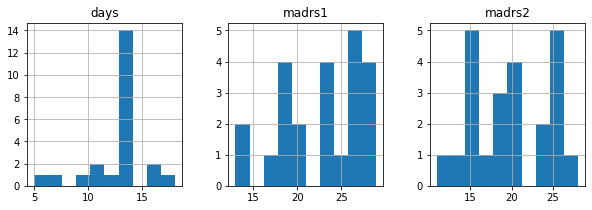

In [20]:
# Histogram
df_condition[features_num].hist(layout=(1,3),figsize = (10,3))
plt.show()

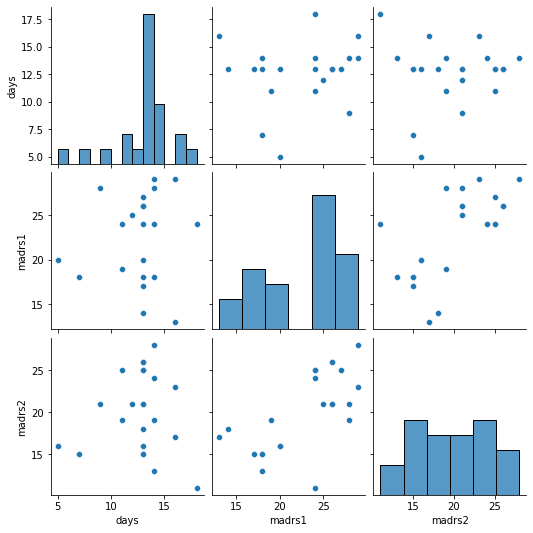

In [21]:
sns.pairplot(df_condition[features_num])
plt.show()

In [22]:
df_condition[features_num].corr()

,days,madrs1,madrs2
days,1.000000,0.122678,0.027726
madrs1,0.122678,1.000000,0.653090
madrs2,0.027726,0.653090,1.000000


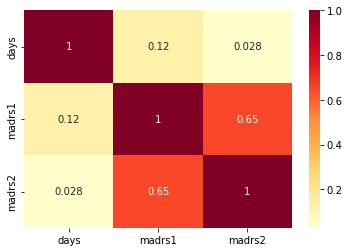

In [23]:
# Heatmap
sns.heatmap(df_condition[features_num].corr(),annot=True,cmap='YlOrRd')
plt.show()

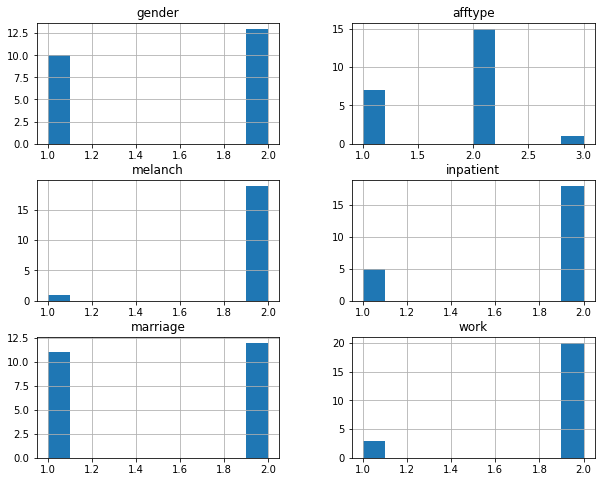

In [24]:
# Histogram
df_condition[features_cat].hist(layout=(3,2),figsize = (10,8))
plt.show()

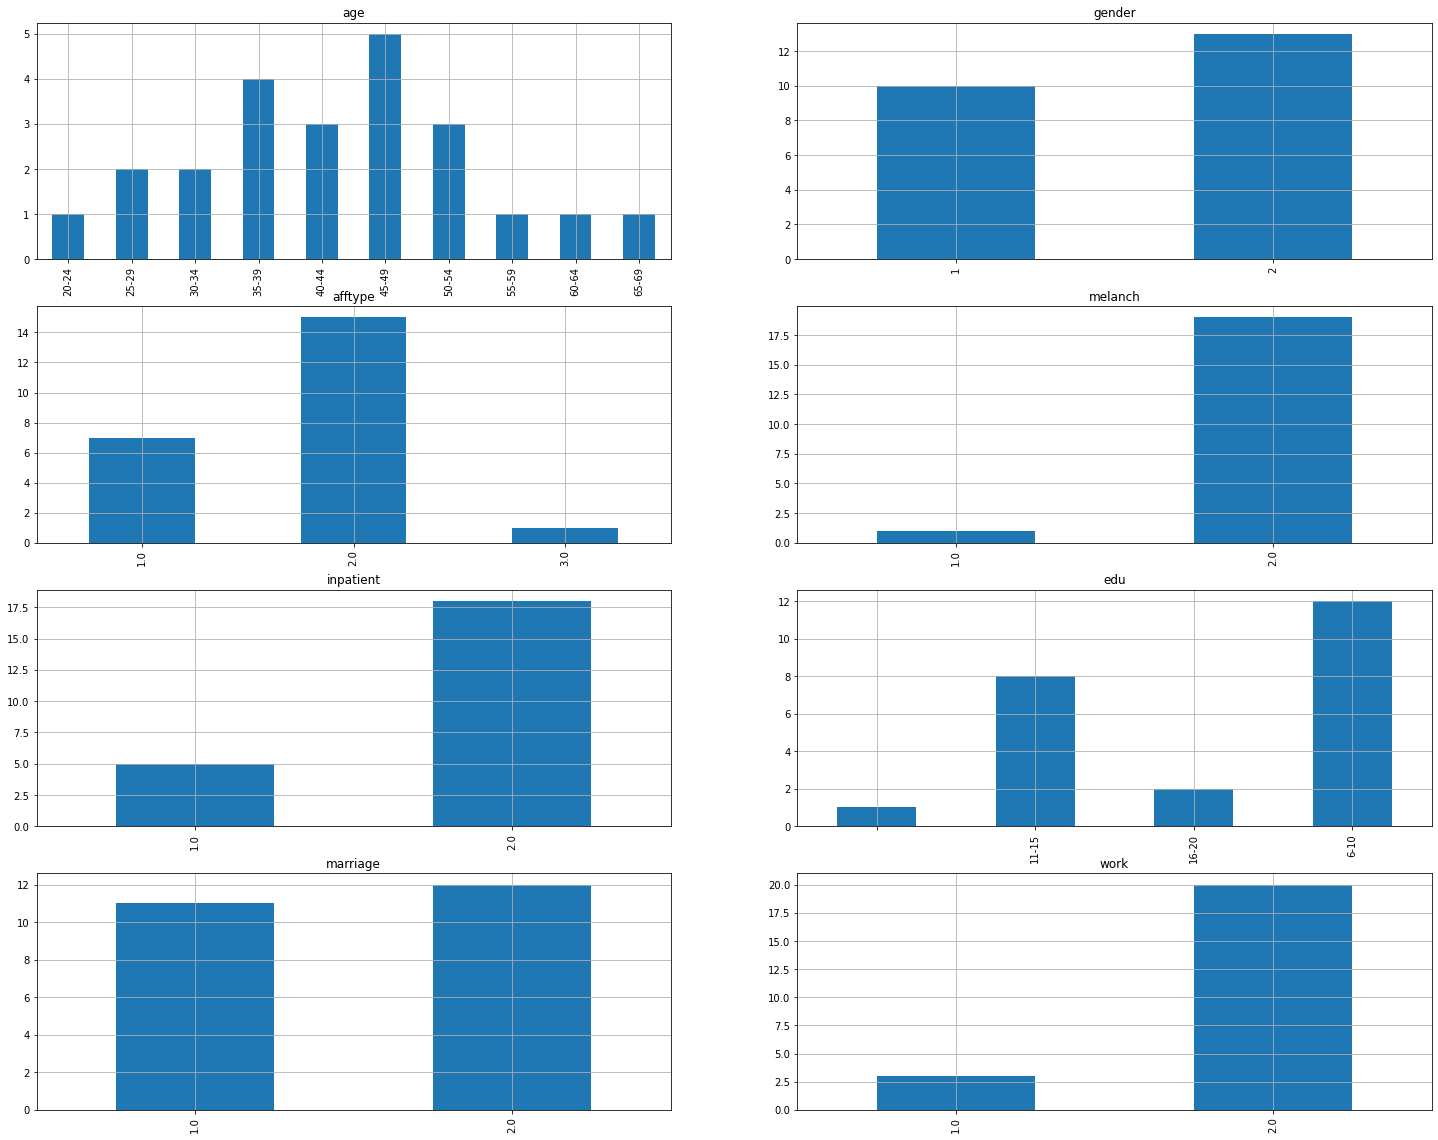

In [25]:
plt.figure(figsize=(25,20))

plt.subplot(4,2,1)
df_condition["age"].value_counts().sort_index().plot(kind="bar")
plt.title("age")
plt.grid()

plt.subplot(4,2,2)
df_condition["gender"].value_counts().sort_index().plot(kind="bar")
plt.title("gender")
plt.grid()
  
    
plt.subplot(4,2,3)
df_condition["afftype"].value_counts().sort_index().plot(kind="bar")
plt.title("afftype")
plt.grid()
 
plt.subplot(4,2,4)
df_condition["melanch"].value_counts().sort_index().plot(kind="bar")
plt.title("melanch")
plt.grid()
  
plt.subplot(4,2,5)
df_condition["inpatient"].value_counts().sort_index().plot(kind="bar")
plt.title("inpatient")
plt.grid()
  
plt.subplot(4,2,6)
df_condition["edu"].value_counts().sort_index().plot(kind="bar")
plt.title("edu")
plt.grid()
  
plt.subplot(4,2,7)
df_condition["marriage"].value_counts().sort_index().plot(kind="bar")
plt.title("marriage")
plt.grid()
  
plt.subplot(4,2,8)
df_condition["work"].value_counts().sort_index().plot(kind="bar")
plt.title("work")
plt.grid()

<AxesSubplot:xlabel='work', ylabel='madrs1'>

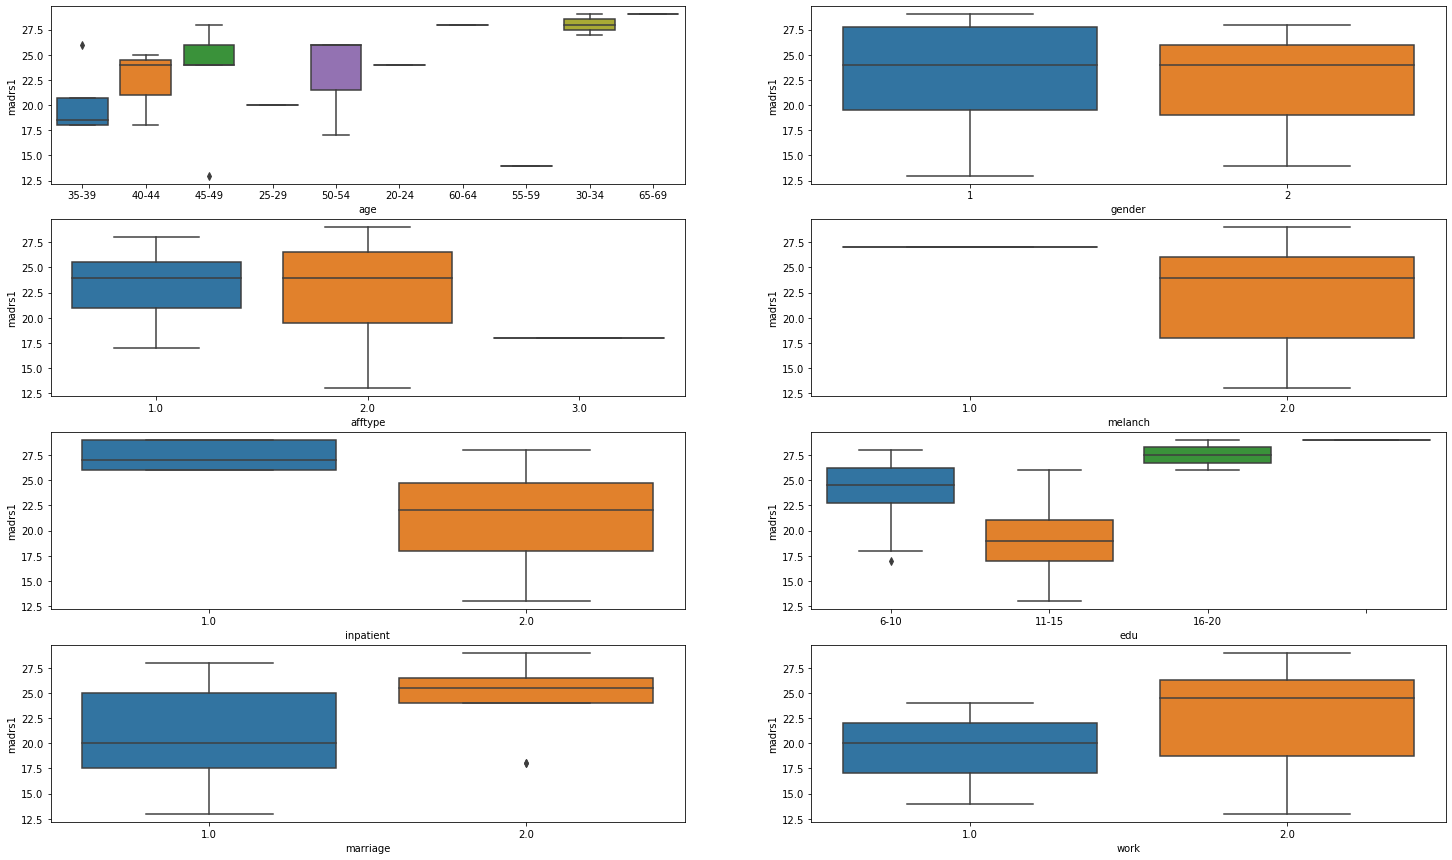

In [26]:
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
sns.boxplot(x='age',y='madrs1',data=df)

plt.subplot(4,2,2)
sns.boxplot(x='gender',y='madrs1',data=df)

plt.subplot(4,2,3)
sns.boxplot(x='afftype',y='madrs1',data=df)

plt.subplot(4,2,4)
sns.boxplot(x='melanch',y='madrs1',data=df)

plt.subplot(4,2,5)
sns.boxplot(x='inpatient',y='madrs1',data=df)

plt.subplot(4,2,6)
sns.boxplot(x='edu',y='madrs1',data=df)

plt.subplot(4,2,7)
sns.boxplot(x='marriage',y='madrs1',data=df)

plt.subplot(4,2,8)
sns.boxplot(x='work',y='madrs1',data=df)


<AxesSubplot:xlabel='work', ylabel='madrs1'>

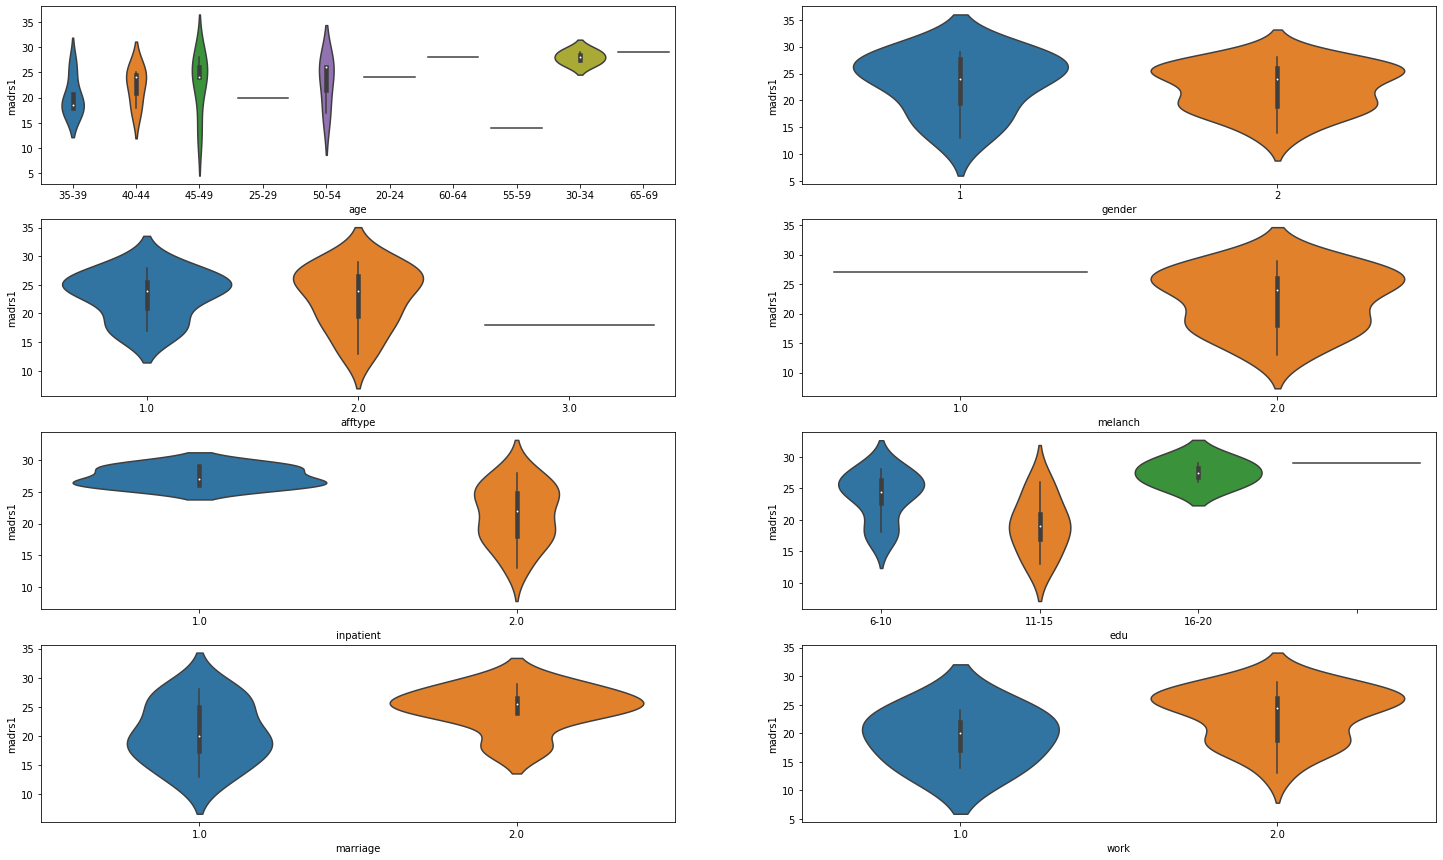

In [27]:
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
sns.violinplot(x='age',y='madrs1',data=df)

plt.subplot(4,2,2)
sns.violinplot(x='gender',y='madrs1',data=df)

plt.subplot(4,2,3)
sns.violinplot(x='afftype',y='madrs1',data=df)

plt.subplot(4,2,4)
sns.violinplot(x='melanch',y='madrs1',data=df)

plt.subplot(4,2,5)
sns.violinplot(x='inpatient',y='madrs1',data=df)

plt.subplot(4,2,6)
sns.violinplot(x='edu',y='madrs1',data=df)

plt.subplot(4,2,7)
sns.violinplot(x='marriage',y='madrs1',data=df)

plt.subplot(4,2,8)
sns.violinplot(x='work',y='madrs1',data=df)

<AxesSubplot:xlabel='work', ylabel='madrs2'>

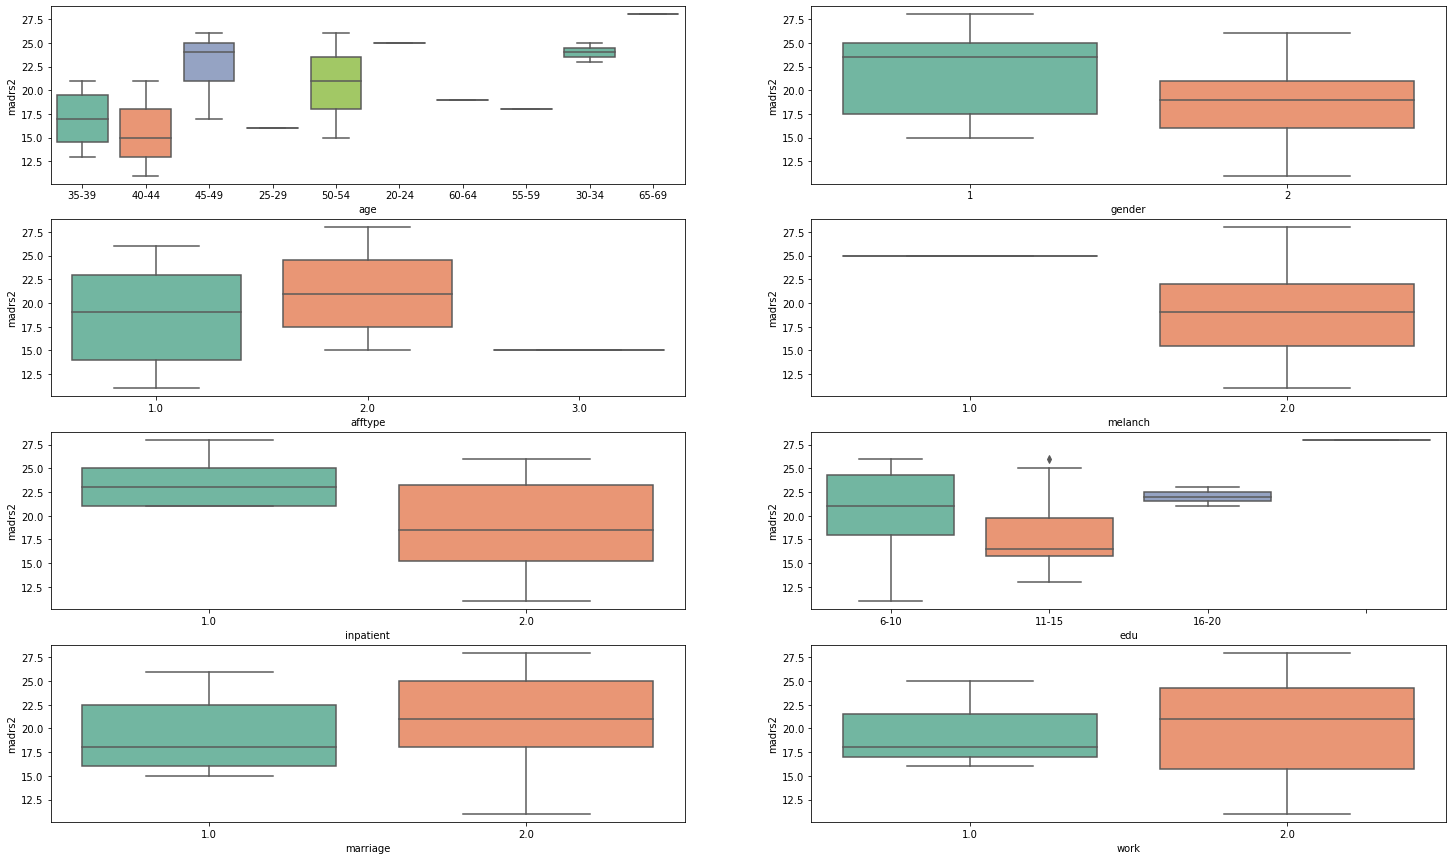

In [28]:
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
sns.boxplot(x='age',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,2)
sns.boxplot(x='gender',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,3)
sns.boxplot(x='afftype',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,4)
sns.boxplot(x='melanch',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,5)
sns.boxplot(x='inpatient',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,6)
sns.boxplot(x='edu',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,7)
sns.boxplot(x='marriage',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,8)
sns.boxplot(x='work',y='madrs2',data=df,palette='Set2')

<AxesSubplot:xlabel='work', ylabel='madrs2'>

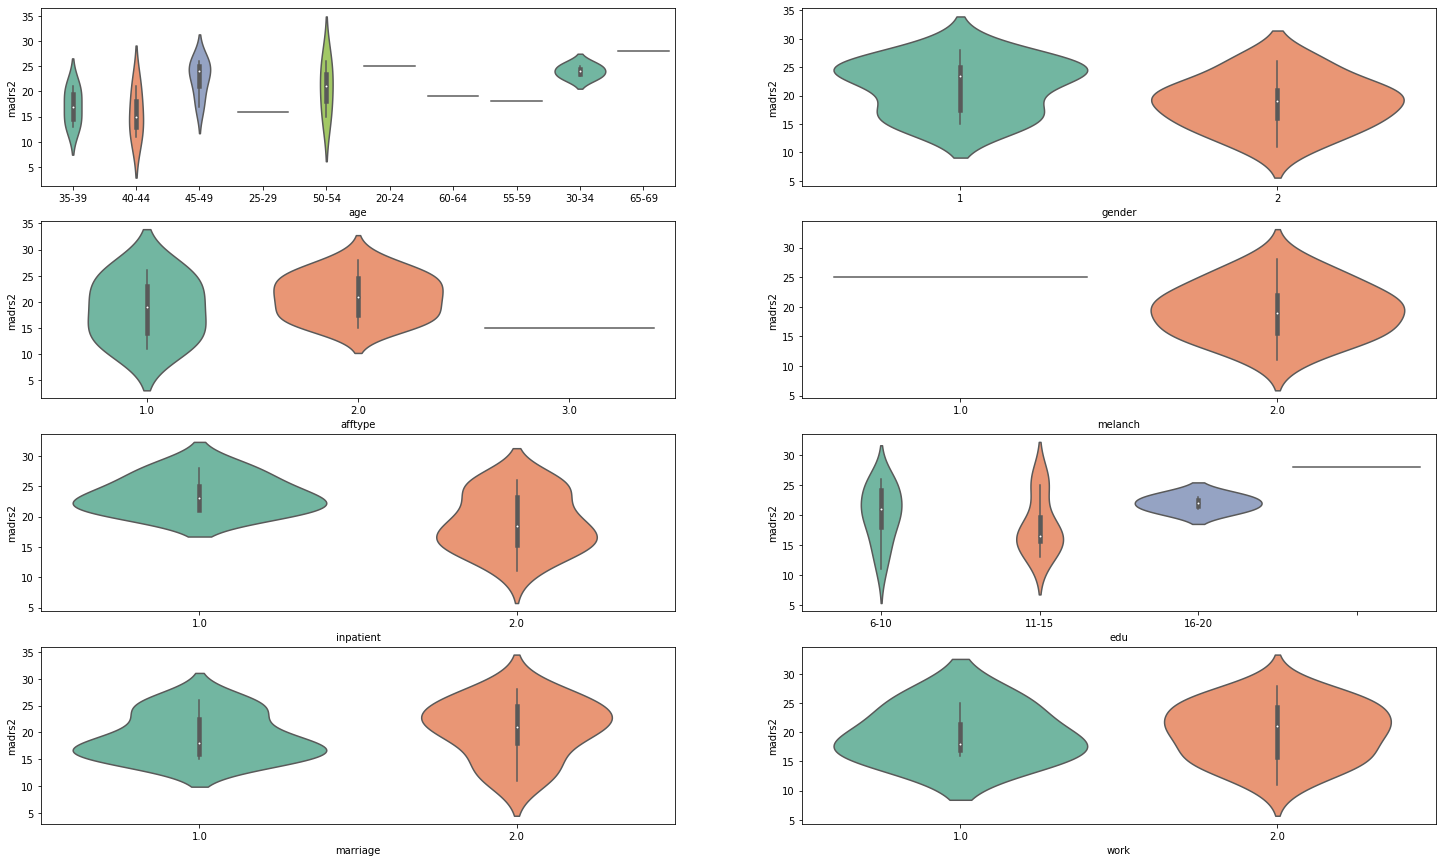

In [29]:
plt.figure(figsize=(25,15))

plt.subplot(4,2,1)
sns.violinplot(x='age',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,2)
sns.violinplot(x='gender',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,3)
sns.violinplot(x='afftype',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,4)
sns.violinplot(x='melanch',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,5)
sns.violinplot(x='inpatient',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,6)
sns.violinplot(x='edu',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,7)
sns.violinplot(x='marriage',y='madrs2',data=df,palette='Set2')

plt.subplot(4,2,8)
sns.violinplot(x='work',y='madrs2',data=df,palette='Set2')

In [30]:
df_control.shape

(32, 12)

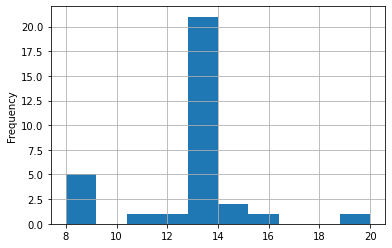

In [31]:
# Histogram
df_control.days.plot(kind='hist')
plt.grid()
plt.show()

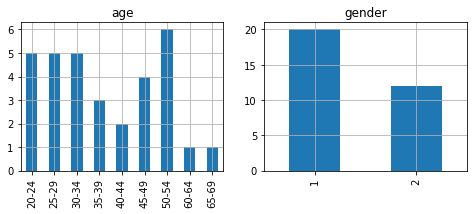

In [32]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
df_control["age"].value_counts().sort_index().plot(kind="bar")
plt.title("age")
plt.grid()

plt.subplot(2,2,2)
df_control["gender"].value_counts().sort_index().plot(kind="bar")
plt.title("gender")
plt.grid()

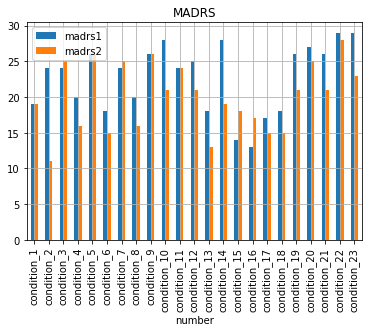

In [33]:
df_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS')
plt.grid()
plt.show()

In [35]:
df_condition1=pd.read_csv('/Users/swetha/condition_1.csv')

In [36]:
df_condition1.head(3)

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0


In [37]:
df_condition1.shape

(23244, 3)

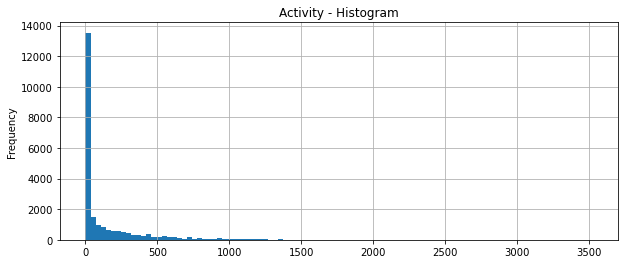

In [38]:
plt.figure(figsize=(10,4))
df_condition1.activity.plot(kind='hist', bins=100)
plt.title('Activity - Histogram')
plt.grid()
plt.show()

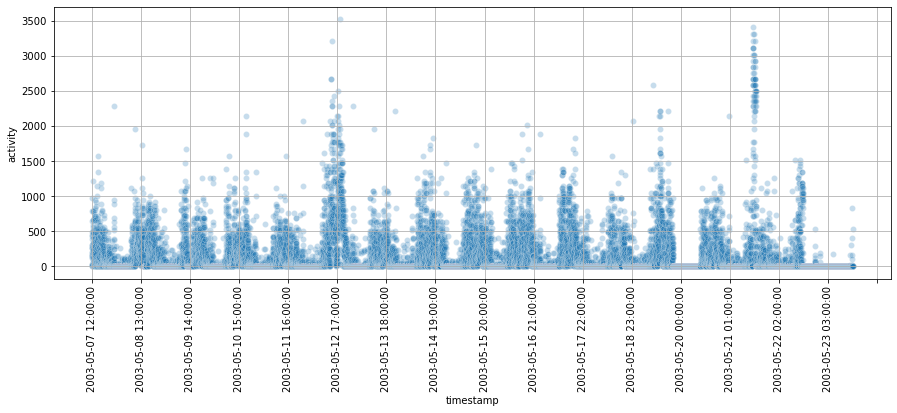

In [39]:
plt.figure(figsize=(15,5))

ax = sns.scatterplot(df_condition1.timestamp, df_condition1.activity, alpha=0.25)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

plt.xticks(rotation=90)
plt.grid()
plt.show()

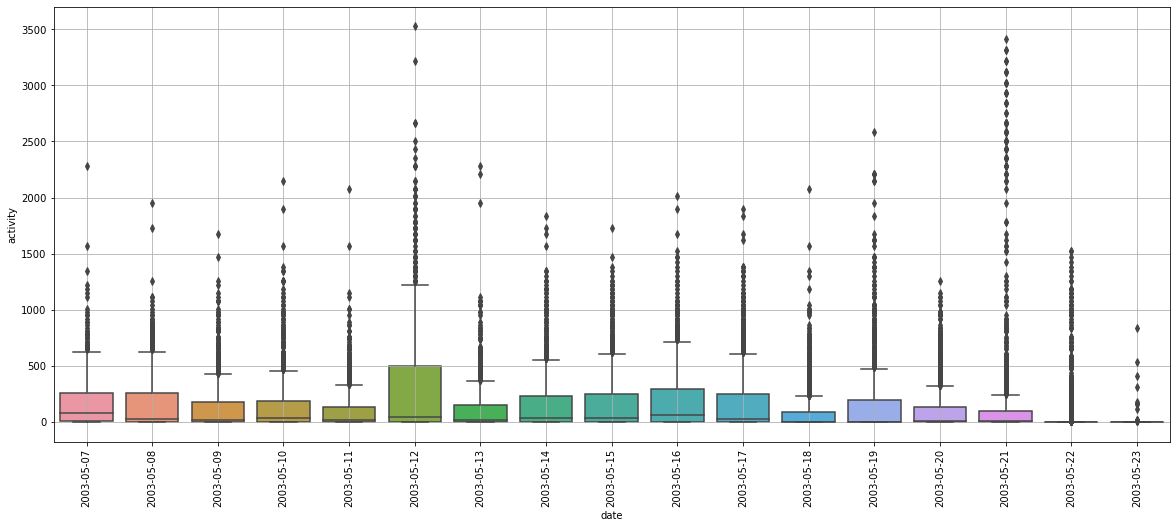

In [40]:
plt.subplots(figsize=(20,8))

sns.boxplot(data=df_condition1, x='date', y='activity')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [42]:
df_condition2=pd.read_csv('/Users/swetha/condition_2.csv')

In [43]:
df_condition2.head(3)

,timestamp,date,activity
0,2003-05-07 15:00:00,2003-05-07,1468
1,2003-05-07 15:01:00,2003-05-07,1006
2,2003-05-07 15:02:00,2003-05-07,468


In [44]:
df_condition2.shape

(38926, 3)

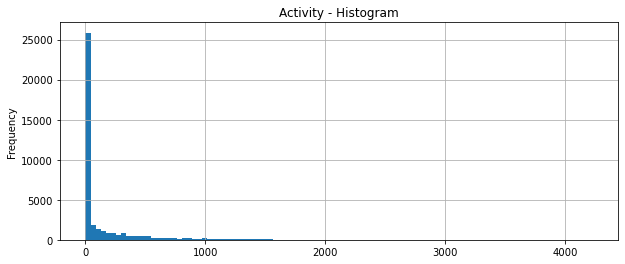

In [45]:
plt.figure(figsize=(10,4))
df_condition2.activity.plot(kind='hist', bins=100)
plt.title('Activity - Histogram')
plt.grid()
plt.show()

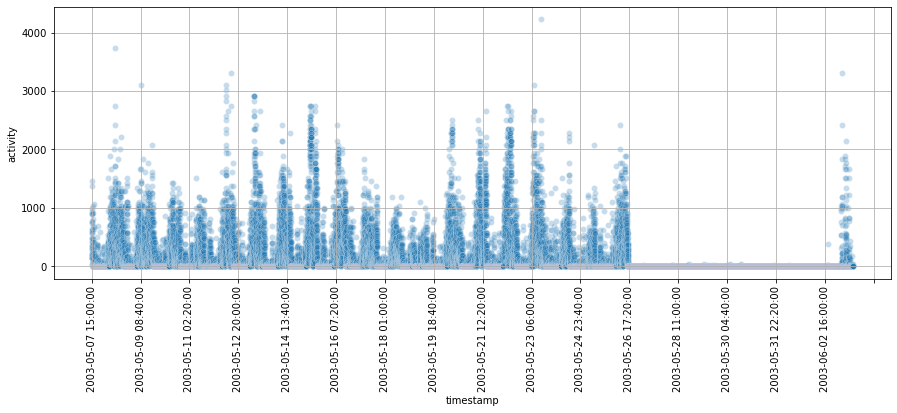

In [46]:
plt.figure(figsize=(15,5))

ax = sns.scatterplot(df_condition2.timestamp, df_condition2.activity, alpha=0.25)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

plt.xticks(rotation=90)
plt.grid()
plt.show()

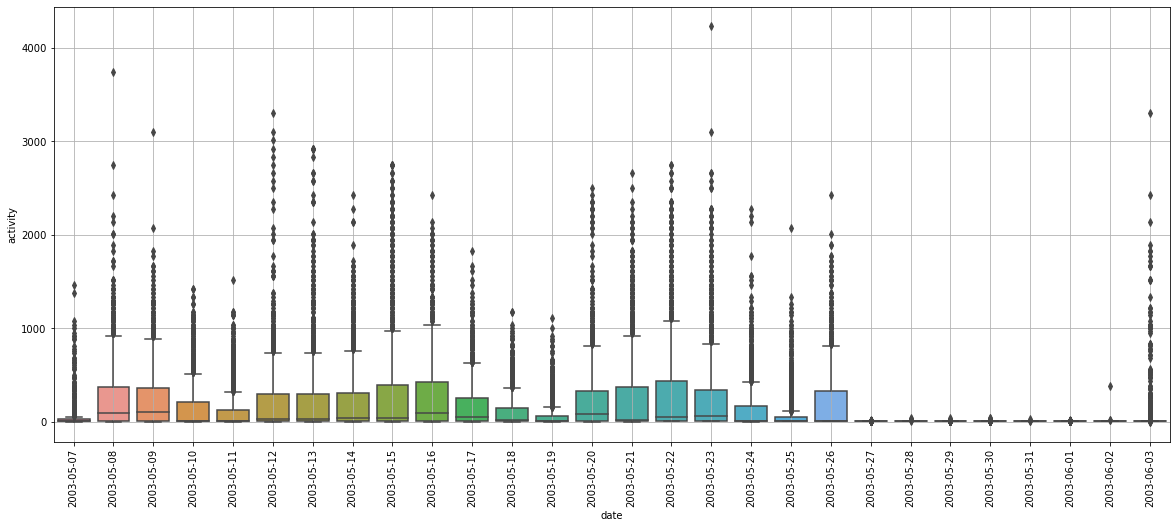

In [47]:
plt.subplots(figsize=(20,8))

sns.boxplot(data=df_condition2, x='date', y='activity')
plt.xticks(rotation=90)
plt.grid()
plt.show()